## Задание 1.
Компания имеет расширенную сеть по всей России и планирует повышение цен на свои услуги. Она не знает заранее, какие последствия могут иметь такие действия, так как эластичность спроса по цене не известна, поэтому не хочет повышать цены сразу везде.
Необходимо:
Помочь продакту спроектировать тест, который сможет показать эластичность спроса по цене и принять решение о росте цен. Для этого необходимо:
- определить ключевые метрики теста
- определить принципы отбора территорий для теста
- описать способ определения периода проведения теста и размера выборки
- описать методы подведения итогов теста.
Обратите внимание, что 1 регион для теста уже выбран – это регион 1. Именно в нем мы будем повышать цены

2. На основании представленных данных по периодам до и во время теста по выбранным вами регионам подвести итоги теста, сделать выводы и помочь продакту принять решение о дальнейших шагах по повышению цен.

Сведения о компании:
- компания занимается продажей товаров в b2b и b2c-сегментах по всей России
- решение о росте цен было принято на основании анализа цен ближайшего конкурента и расчета ценового индекса 
- есть сезонность по месяцам года в части объемов продаж, количества заказов, среднего чека и конверсии в продажу
- на период теста не планируется проведение иных активностей, которые могут исказить результаты

Исходные данные (помесячно за 2 года + 1 месяц во время проведения теста)
- количество заказов
- выручка
- средний чек
- конверсия в покупку
- количество клиентов

# 1. Загрузка библиотек и данных 

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import scipy
import numpy as np
import statistics
%matplotlib inline

In [2]:
df = pd.read_excel('Данные для 1 и 2 задания.xlsx', sheet_name='Задание 1')

In [3]:
df.head(3)

,Показатели,Регионы,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,01.09.2019,01.10.2019,01.11.2019,01.12.2019,01.01.2020,...,01.10.2020,01.11.2020,01.12.2020,01.01.2021,01.02.2021,01.03.2021,01.04.2021,01.05.2021,01.06.2021,Месяц теста
0,Количество клиентов,Регион 1,112666.502570,126699.861608,143468.197244,159326.75,157465.25,160564.50,157047.333333,143002.333333,...,127578.645161,125339.466667,110713.516129,82460.096774,98066.821429,106744.870968,114725.366667,113339.066667,130155.965517,132986.0
1,Количество клиентов,Регион 2,99659.878457,112073.176324,126905.715307,140933.50,153894.00,152953.25,162388.666667,141111.333333,...,334391.290323,317191.266667,313019.838710,316147.387097,365391.550000,405310.161290,378292.000000,328104.166667,352059.344828,365987.0
2,Количество клиентов,Регион 3,436973.812812,491401.795092,556437.306007,617944.25,579099.00,546487.25,521581.000000,498440.000000,...,673691.225806,664800.433333,649504.161290,813206.967742,817970.250000,773434.928571,847185.400000,919424.100000,949497.620690,989765.0


# 2. Предподготовка данных

In [4]:
df = df.transpose()# поменяем колонки со столбцами

In [5]:
df.columns=["Кол_клиентов_1","Кол_клиентов_2","Кол_клиентов_3","Кол_клиентов_4",
"Выручка_1","Выручка_2","Выручка_3","Выручка_4","Кол_заказов_1","Кол_заказов_2","Кол_заказов_3","Кол_заказов_4",
"Средний_чек_1","Средний_чек_2","Средний_чек_3","Средний_чек_4","Конверсия_1","Конверсия_2","Конверсия_3","Конверсия_4"]
# изменим название колонок


In [6]:
df.drop(['Показатели','Регионы'],inplace=True) # удалим не нужные строки 

In [7]:
df.shape # размер

(26, 20)

In [8]:
date_1 = pd.date_range('2019-06-01', periods=26, freq='MS')

In [9]:
df.index=date_1# сделаем индекс из дат

In [10]:
for i in df.columns[:]:
    df[i]=df[i].astype('int') # изменим тип данных

In [11]:
df['Год']=[i for i in df.index.year] # добавим столбец Год

## 3. Определить ключевые метрики теста

Ключевые метрики теста : 
- Выручка 
- Средний чек
- Конверсия.

Второстепенные метрики теста:
 - Количество клиентов;
 - Количество заказов.


## 4. Определить принципы отбора территорий для теста

Исходя из условий нам известно, что тестовый регион -  регион № 1, период проведения теста - 01.07.2021. Чтобы выбрать контрольный регион нам необходимо сравнить метрики региона № 1 с метриками остальных регионов (за 2 года). Согласно данным (без учета среднего чека) регион № 1 находится на последнем месте в разрезе других регионов по показателям (далее № 2,3,4), в связи с чем он и являлся тестовым регионом для поднятия цены.

In [12]:
df.describe()

,Кол_клиентов_1,Кол_клиентов_2,Кол_клиентов_3,Кол_клиентов_4,Выручка_1,Выручка_2,Выручка_3,Выручка_4,Кол_заказов_1,Кол_заказов_2,...,Кол_заказов_4,Средний_чек_1,Средний_чек_2,Средний_чек_3,Средний_чек_4,Конверсия_1,Конверсия_2,Конверсия_3,Конверсия_4,Год
count,26.000000,26.000000,26.000000,26.000000,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,26.000000,26.000000,...,2.600000e+01,26.000000,26.000000,26.000000,26.000000,26.0,26.000000,26.000000,26.0,26.000000
mean,125440.692308,235154.500000,642050.307692,429554.807692,7.125130e+06,1.266882e+07,2.914516e+07,1.465880e+07,249345.038462,281624.769231,...,1.975364e+06,29567.615385,46172.346154,28834.230769,7576.500000,2.0,2.076923,3.076923,7.0,2020.000000
std,21210.999131,102573.469587,162675.080004,188585.721196,3.944264e+05,9.478546e+05,2.522926e+06,6.201367e+05,47483.675072,42250.825286,...,2.947369e+05,5744.019262,8846.441079,5942.393782,1150.435509,0.0,0.271746,0.271746,0.0,0.748331
min,82460.000000,99659.000000,398229.000000,164920.000000,6.415183e+06,1.114571e+07,2.465858e+07,1.308874e+07,178047.000000,206071.000000,...,1.413655e+06,19528.000000,30828.000000,17340.000000,5983.000000,2.0,2.000000,3.000000,7.0,2019.000000
25%,111077.750000,142909.000000,525511.500000,283299.750000,6.968339e+06,1.184448e+07,2.703275e+07,1.442185e+07,216684.250000,250697.500000,...,1.821809e+06,24372.250000,37684.500000,23978.500000,6890.500000,2.0,2.000000,3.000000,7.0,2019.250000
50%,124090.000000,205545.500000,598521.500000,379431.000000,7.091019e+06,1.255606e+07,2.903565e+07,1.470054e+07,234269.000000,279138.500000,...,1.993967e+06,30475.500000,45531.500000,28907.500000,7187.000000,2.0,2.000000,3.000000,7.0,2020.000000
75%,143351.500000,325375.750000,748498.250000,590617.000000,7.225655e+06,1.345883e+07,3.119541e+07,1.493632e+07,280863.750000,314823.250000,...,2.213036e+06,32892.000000,52752.000000,33788.000000,8091.750000,2.0,2.000000,3.000000,7.0,2020.750000
max,160564.000000,405310.000000,989765.000000,835498.000000,8.765098e+06,1.424365e+07,3.398778e+07,1.609529e+07,354664.000000,383712.000000,...,2.449504e+06,40470.000000,62901.000000,38369.000000,10460.000000,2.0,3.000000,4.000000,7.0,2021.000000


In [13]:
vurychka=["Средний_чек_1","Средний_чек_2","Средний_чек_3","Средний_чек_4"]
a_zakaz=pd.pivot_table(df,index=['Год'],values=["Кол_заказов_1","Кол_заказов_2","Кол_заказов_3","Кол_заказов_4"],aggfunc=np.sum)

Сравним средний чек по регионам за 2019 и 2021 год

Text(0, 0.5, 'Money')

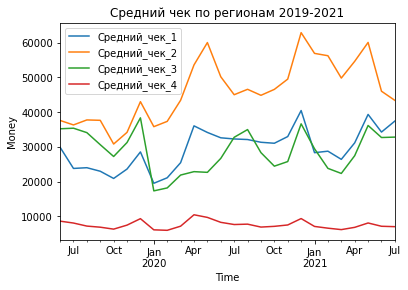

In [14]:
df[vurychka].plot(title='Средний чек по регионам 2019-2021')
plt.xlabel('Time')
plt.ylabel('Money')

### Из графика "Средний чек по регионам 2019-2021" видно, что регион № 3 близкий по среднему чеку (одна из ключевых метрик) с регионом № 1. 

Сравним количество заказов по регионам за 2019 и 2021 год

<AxesSubplot:xlabel='Год'>

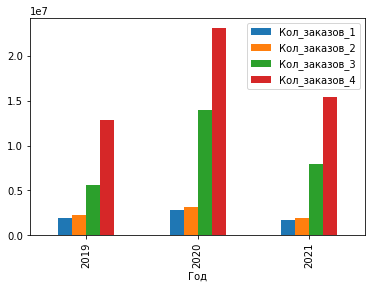

In [15]:
a_zakaz.plot(kind='bar')

### В данном случае регион № 2 близкий по значениям (второстепенная метрика) с регионом № 1 в разрезе годовых значений. 

Для выбора контрольного региона воспользуемся тестом корреляции Пирсона. Но для начала посмотрим нормально ли распределены наши данные по среднему чеку и количеству заказов (тест Шапиро-Уилк).

In [16]:
for i in [df["Средний_чек_1"],df["Средний_чек_3"],df["Кол_заказов_1"],df["Кол_заказов_2"]]:
    stat, p = scipy.stats.shapiro(i) # тест Шапиро-Уилк
    alpha = 0.05
    if p > alpha:
        print('Принять гипотезу о нормальности')
    else:
        print('Отклонить гипотезу о нормальности')

Принять гипотезу о нормальности
Принять гипотезу о нормальности
Принять гипотезу о нормальности
Принять гипотезу о нормальности


In [17]:
from scipy.stats import pearsonr

In [18]:
stat, p = pearsonr(df.loc[:'2021-06-01','Средний_чек_1'], df.loc[:'2021-06-01','Средний_чек_3'])

print('stat=%.3f, p=%.3f' % (stat, p))
if p < 0.05:
    print('Группы разные')
else:
    print('Группы похожи')

stat=0.342, p=0.095
Группы похожи


In [19]:
stat, p = pearsonr(df.loc[:'2021-06-01','Кол_заказов_1'], df.loc[:'2021-06-01','Кол_заказов_2'])

print('stat=%.3f, p=%.3f' % (stat, p))
if p < 0.05:
    print('Группы разные')
else:
    print('Группы похожи')

stat=0.784, p=0.000
Группы разные


### Вывод: исходя из данных на графике "Средний чек по регионам 2019-2021" и проведенному тесту корреляции Пирсона можно сделать вывод, что контрольным регионом  для теста является регион № 3

## 5. Описать способ определения периода проведения теста и размера выборки

### Определим размер выборки по регионам №№ 1,3 с помощью калькулятора mindbox (с уровнем доверия 95%) https://mindbox.ru

In [20]:
print("Средняя конверсия по региону № 1 -",df.loc[:'2021-06-01','Конверсия_1'].mean())
print("Средняя конверсия по региону № 3 -",df.loc[:'2021-06-01','Конверсия_3'].mean())

Средняя конверсия по региону № 1 - 2.0
Средняя конверсия по региону № 3 - 3.08


#### В данном случае предположим, что увелечение цены товара в регионах №№ 1,3 увеличат конверсию на 0,2%.                 

Укажем данные в калькуляторе mindbox:
- средний показатель 2%, ожидаемый прирост 0,2% по региону № 1;
- средний показатель 3.08%, ожидаемый прирост 0,2% по региону № 3.

Также можно использовать произвольный подход основанный на применении "правила большого пальца", для получения точных результатов необходима выборка 5% от генеральной совокупности. 

In [21]:
print( "Калькулятор mindbox: выборка в регионе № 1 - 153842 человека, выборка в регионе № 3 - 234306 человека")

Калькулятор mindbox: выборка в регионе № 1 - 153842 человека, выборка в регионе № 3 - 234306 человека


In [22]:
print("Правила большого пальца: выборка в регионе № 1 - {},выборка в регионе № 3 - {} ".format(round(df.loc[:'2021-06-01','Кол_клиентов_1'].mean()*0.05),round(df.loc[:'06.01.2021','Кол_клиентов_3'].mean()*0.05)))

Правила большого пальца: выборка в регионе № 1 - 6257,выборка в регионе № 3 - 31407 


In [23]:
print ('Среднее кол. клиентов в регионе № 1 {} за 2 года, Среднее кол. клиентов в регионе № 3 {} за 2 года'.format(round(df.loc[:'2021-06-01','Кол_клиентов_1'].mean()),round(df.loc[:'06.01.2021','Кол_клиентов_3'].mean())))

Среднее кол. клиентов в регионе № 1 125139 за 2 года, Среднее кол. клиентов в регионе № 3 628142 за 2 года


 ### Вывод: Исходя из полученных сведений о количестве необходимых клиентов для проведения теста в регионах №№ 1,3 (калькулятор "mindbox") и результатах выборки по среднему количеству клиентов по указанным регионам за два года можно сделать вывод, что для проведения теста необходимо не более 1 месяца 

Также для получения валидных данных необходимо посмотреть на сезонность по месяцам года, что бы учитывать это при проведении теста

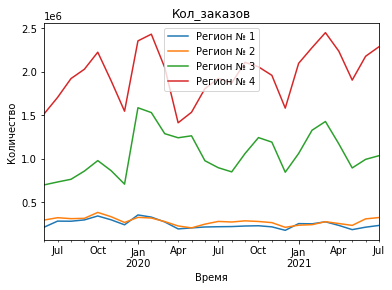

In [24]:
ax = df[["Кол_заказов_1","Кол_заказов_2","Кол_заказов_3","Кол_заказов_4"]].plot(title = 'Кол_заказов')
plt.xlabel('Время')
plt.ylabel('Количество')
ax.legend(["Регион № 1","Регион № 2","Регион № 3","Регион № 4"],loc = 'upper center')

Как видно на графике присутвует сезонность:
- октябрь - декабрь наблюдается снижение;
- декабрь - январь наблюдается рост.
В связи с вышеизложенным надо исключить проведение теста в эти периоды для получения более валидных данных либо их учитывать при проведении теста

# 6. Описать методы подведения итогов теста

- Проведем анализ статистической значимости по среднему чеку в наших версиях (регион № 1,3);
- Проведем анализ динамики продаж. Темп роста выручки(%)= (Выручка текущего периода/ Выручка прошлого периода)*100 в разрезе регинов №№ 1,3 (текущий период -01.07.2021, прошлый период - 01.06.2021);
- Проведем анализ динамики конверсии. Темп роста конверсии(%)= (Выручка текущего периода/ Выручка прошлого периода)*100 в разрезе регинов №№ 1,3 (текущий период -01.07.2021, прошлый период - 01.06.2021);

Дополнительно по регионам №№ 1,3 посмотрим:
- Рост клиентов(%)= (Кол_клиентов текущего периода/ Кол_клиентов прошлого периода)*100;

# 7. Итоги теста

### - Проведем t_test  по среднему чеку в регионах № 1,3.
Нулевая гипотеза H0: Между средним значением по чеку в регионах № 1 и 3 нет существенной разницы;

Альтернативная гипотеза: Существует значительная разница между средним значением по чеку региона № 1 по сравнению с регионом № 3

In [25]:
def t_test (a, b):
    е, p =scipy.stats.ttest_ind(a, b)
    alpha = 0.05
    if p > alpha:
        print('Разница между средними чеками двух регионов не является статистически значимой')
    else:
        print('Разница между средними чеками двух регионов является статистически значимой')

In [26]:
t_test(df.loc['2021-07-01','Средний_чек_1'],df.loc['2021-07-01','Средний_чек_3'])

Разница между средними чеками двух регионов является статистически значимой


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


 - В данном случае выигрывает метрика "Средний чек" в регионе № 1

### -  Проведем анализ динамики конверсии

In [27]:
Темп_роста_конв1 = round(((df.loc['2021-07-01'].Конверсия_1/df.loc['2021-06-01'].Конверсия_1)-1)*100,2)

In [28]:
Темп_роста_конв3 = round(((df.loc['2021-07-01'].Конверсия_3/df.loc['2021-06-01'].Конверсия_3)-1)*100,2)

In [29]:
print('Темп роста конверсии по региону № 1:',Темп_роста_конв1)
print('Темп роста конверсии по региону № 3:',Темп_роста_конв3) 

Темп роста конверсии по региону № 1: 0.0
Темп роста конверсии по региону № 3: 0.0


 - В данном случае рост конверсии в регионах № 1,3 отсутствует

### - Проведем анализ динамики продаж

In [30]:
Темп_роста_выручки1 = round(((df.loc['2021-07-01'].Выручка_1/df.loc['2021-06-01'].Выручка_1)-1)*100,2)

In [31]:
Темп_роста_выручки3 = round(((df.loc['2021-07-01'].Выручка_3/df.loc['2021-06-01'].Выручка_3)-1)*100,2)

In [32]:
print('Темп роста выручки по региону № 1:',Темп_роста_выручки1)
print('Темп роста выручки по региону № 3:',Темп_роста_выручки3) 

Темп роста выручки по региону № 1: 19.46
Темп роста выручки по региону № 3: 4.6


 - В данном случае рост выручки в регионе № 1 в процентном соотношении выше, чем в регионе № 3

### Допонительно посмотрим как повлияло на количество клиентов поднятие цены в регионе № 1

In [33]:
b_klient = df.loc['2021-06-01':'2021-07-01','Кол_клиентов_1']

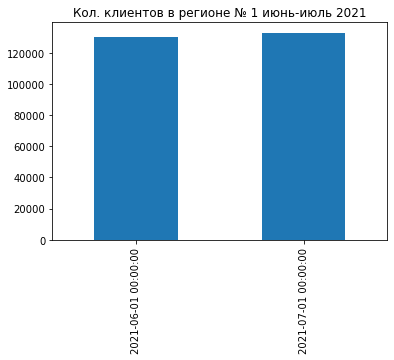

In [34]:
re =b_klient.plot(kind='bar', title='Кол. клиентов в регионе № 1 июнь-июль 2021')

 - В данном случае после поднятие цены количество клиентов в регионе № 1 не снизилось

## Вывод по заданию № 1: 
 - по итогам теста выручка в регионе № 1 по сравнению с АППГ выросла на 19,46%; 
 - метрика "среднего чека" в регионе № 1 выше, чем в контрольном регионе № 3;
 - метрика по конверсии и количеству клиентов в связи с повышением цен в регионе № 1 не снизилась.

 Исходя из полученных данных тест является успешным.                                                         Следующее повышение цены необходимо производить в регионе № 2, чтобы снизить риски в случае неудачного эсперимента по повышению цены  (по показателемя выручки и конверсии после региона № 1 следует регион № 2).

# Задание 2.
Продакт после принятия решения о росте цен из предыдущего задания
не уверен до конца, что все было сделано верно. Поэтому он просит
аналитика рассчитать прогноз LTV новых клиентов, которые пришли
после повышения цен, и сравнить с LTV клиентов, которые приходили в
компанию ранее.
Необходимо:
1. По исходным данным сделать прогноз LTV на год по новым
клиентам, которые пришли после проведенного теста
2. Сравнить полученные данные по LTV с теми клиентами, которые
приходили в компанию до проведения теста
3. Сделать выводы о том, насколько повышение цен влияет на
годовом диапазоне на потенциальный LTV, стоит ли
корректировать цены и если да, то в какую сторону?
Исходные данные (за 2 года):

• Месяц первой покупки
• Retention rate в покупку в следующем месяце по каждой когорте
• Средний чек до теста
• Средний чек когорты теста
• Среднее количество клиентов в когорте
• Средняя кратность покупок клиентов

# 1. Загрузка данных

In [35]:
df2 = pd.read_excel('Данные для 1 и 2 задания.xlsx', sheet_name='Задание 2')

# 2. Предподготовка данных

In [36]:
def preobr(x):
    x.drop(["Retention rate в месяц с момента первой покупки, %","Месяц первой покупки"],axis=1,inplace=True)
    x = x[1:27]
    date_2 = pd.date_range('2019-06-01', periods=26, freq='MS')
    x.index=date_2
    x.columns=["Месяц1_RR","Месяц2_RR","Месяц3_RR","Месяц4_RR",
"Месяц5_RR","Месяц6_RR","Месяц7_RR","Месяц8_RR","Месяц9_RR","Месяц10_RR","Месяц11_RR","Месяц12_RR"]
    return x
    

In [37]:
df2=preobr(df2)

In [38]:
df2.tail(1)

,Месяц1_RR,Месяц2_RR,Месяц3_RR,Месяц4_RR,Месяц5_RR,Месяц6_RR,Месяц7_RR,Месяц8_RR,Месяц9_RR,Месяц10_RR,Месяц11_RR,Месяц12_RR
2021-07-01,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 3. Прогноз Retention rate по когорте "2021-07-01"

In [39]:
import warnings
import statsmodels.api as sm
import itertools

Для прогноза Retention rate используем модель временных рядов SARIMAX.

In [40]:
def sari_m(x):
    a=[]
    for i in df2.index:
        for j in df2.loc[i]:
            a.append(j)
    return pd.DataFrame(a,columns=['Месяц_RR'])[:301] 

In [41]:
sarima = sari_m(df2)# для использования модели временных рядов SARIMAX, сделаем из строк одну колонку 

Чтобы подобрать отимальные значения параметров для модели временного ряда SARIMA (p, d, q) (P, D, Q), используем сеточный поиск.

In [42]:
# Определите p, d и q в диапазоне 0-2
p = d = q = range(0, 2)
# Сгенерируйте различные комбинации p, q и q
pdq = list(itertools.product(p, d, q))
# Сгенерируйте комбинации сезонных параметров p, q и q
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))] 

In [43]:
warnings.filterwarnings("ignore") # отключает предупреждения

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(sarima['Месяц_RR'],order=param,seasonal_order=param_seasonal, enforce_stationarity=False, enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:2174.021513071644
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1752.5913110550218
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:641.5632823966932
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:553.2792618672393
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:639.6449129029245
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:595.4933776776857
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:559.0378496546562
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:558.2688544529879
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:2001.5395287456809
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1612.4307673573117
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:620.0415180498279
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:526.6484956025873
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:626.7720940565373
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:558.5915139768058
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:537.7946799570311
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:530.9088793946686
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1890.934772424598
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1514.5303953437017
ARIMA(

Согласно полученному выводу, SARIMAX(1, 1, 1)x(0, 1, 1, 12) получает наименьший показатель AIC (487.88). Следовательно, эти параметры можно считать оптимальными.

In [44]:
size = int(len(sarima) * 0.7)

In [45]:
train = sarima['Месяц_RR'][0:size]
test = sarima['Месяц_RR'][size:]

In [46]:
import warnings
warnings.simplefilter(action = 'ignore', category = Warning)
 
# обучим модель с соответствующими параметрами, SARIMAX(1, 1, 1)x(0, 1, 1, 12)
# импортируем класс модели
from statsmodels.tsa.statespace.sarimax import SARIMAX
 
# создадим объект этой модели
model = SARIMAX(train, 
                order = (1, 1, 1), 
                seasonal_order = (0, 1, 1, 12))
 
# применим метод fit
result = model.fit()

In [47]:
# тестовый прогнозный период начнется с конца обучающего периода
start = len(train)
 
# и закончится в конце тестового
end = len(train) + len(test) - 1
  
# применим метод predict
predictions = result.predict(start, end)

Посмотрим как наша модель делает прогноз

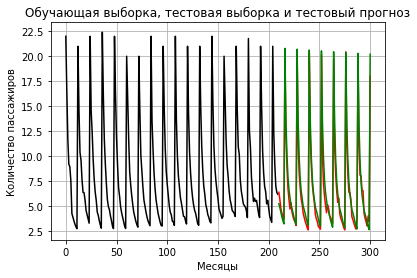

In [48]:
# выведем три кривые (обучающая, тестовая выборка и тестовый прогноз)
plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.plot(predictions, color = "green")
 
# заголовок и подписи к осям
plt.title("Обучающая выборка, тестовая выборка и тестовый прогноз")
 
# добавим сетку
plt.grid()
 
plt.show()

В целом модель хорошо описывает временной ряд, теперь спрогнозируем Retention rate по когорте "2021-07-01" за 11 месяцев

In [49]:
start = len(sarima)
 
# и закончится 12 месяцев спустя
end = (len(sarima)-1) + 11
 
# теперь построим прогноз на года вперед
forecast = result.predict(start, end)

In [50]:
df2.loc['2021-07-01'][1:]=list(forecast)

In [51]:
for i in df2.columns[:]:
    df2[i]=df2[i].astype('int') # изменим тип данных на int

In [52]:
df2.tail(1)

,Месяц1_RR,Месяц2_RR,Месяц3_RR,Месяц4_RR,Месяц5_RR,Месяц6_RR,Месяц7_RR,Месяц8_RR,Месяц9_RR,Месяц10_RR,Месяц11_RR,Месяц12_RR
2021-07-01,18,13,9,7,6,5,4,4,3,3,2,2


# 4. Анализ данных

In [53]:
AOV = 28000# средний чек до теста

In [54]:
AOV_TEST = 34000 # средний после теста

In [55]:
col_client=100000 # количество клиентов в когорте

#### Когорты клиентов и до и после теста совершают 1 покупку в месяц в среднем

# Вычислим LTV в разрезе когорт по формуле: 
LTV = (T x AOV) x ALT

T — количество продаж за месяц (среднее).

AOV — сумма среднего чека.

ALT — срок сотрудничества с пользователем в месяцах (средний).

#### С помощью функции "ср_e" вычислим метрики T и ALT в разрезе когорт, а также создадим столбцы с данными значениями

In [56]:
def ср_e(x):
    for i in x.index:
        x.loc[i,'T']= ((x.loc[i]*col_client)/100).mean()
        x.loc[i,'ALT']=round((100/(100 - x.loc[i])).mean())

In [57]:
ср_e(df2)

In [58]:
df2.head(2)

,Месяц1_RR,Месяц2_RR,Месяц3_RR,Месяц4_RR,Месяц5_RR,Месяц6_RR,Месяц7_RR,Месяц8_RR,Месяц9_RR,Месяц10_RR,Месяц11_RR,Месяц12_RR,T,ALT
2019-06-01,22,16,11,9,8,7,4,3,3,3,2,2,7500.000000,1.0
2019-07-01,21,14,10,9,7,6,6,5,4,4,3,3,7666.666667,1.0


### Расчитаем LTV по когортам

In [59]:
a = round(df2.loc[:'2021-06-01','T']*AOV) # расчитаем LTV по контрольным когортам

In [60]:
a['2021-07-01 00:00:00'] = round(df2.loc['2021-07-01','T']*AOV_TEST)# расчитаем LTV по тестовой когорте

In [61]:
LTV = pd.DataFrame({"LTV":a},index =pd.date_range('2019-06-01', periods=26, freq='MS'))

Text(0, 0.5, 'Сумма')

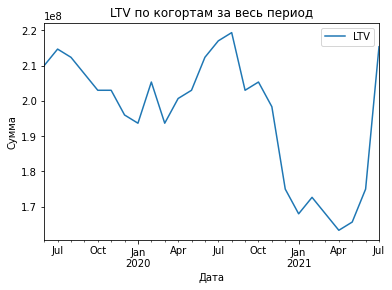

In [62]:
LTV.plot(title = 'LTV по когортам за весь период')
plt.xlabel('Дата')
plt.ylabel('Сумма')

<AxesSubplot:title={'center':'LTV'}, xlabel='Сумма', ylabel='Когорта'>

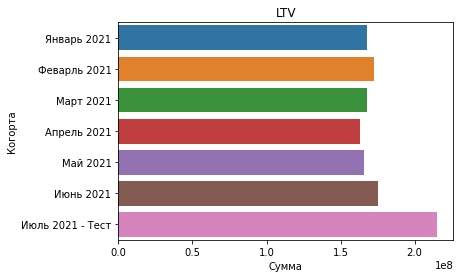

In [63]:
x = ['Январь 2021', 'Феварль 2021', 'Март 2021','Апрель 2021', 'Май 2021', 'Июнь 2021', 'Июль 2021 - Тест']
y = LTV.loc['2021-01-01':,'LTV'].values
plt.xlabel('Сумма')
plt.ylabel('Когорта')
plt.title("LTV")
sns.barplot(x=y, y=x)

## Выводы  по заданию № 2 : 
Согласно полученным данным наблюдается общее снижение LTV клиентов пришедших в 2021 году по сравнению с клиентами 2020 года.  В тестовой когорте (июль 2021 года) повышение цены повлияло на увелечение потенциального LVT по сравнению с остальными когортами 2021 года. С целью достижения в 2021 году показателей LTV когорт 2020 года необходимо скорректировать цены в сторону увеличения.                       

# Задание 3.
После окончательного принятия решения по ценам продакт решил
провести анализ поведения пользователей на сайте, чтобы улучшить
конверсию в продажу. Анализ такого рода ранее не проводился, есть
гипотеза, что мы теряем деньги на промежуточных шагах конверсии.
Необходимо:
1. Провести анализ основных этапов создания заказа и выяснить
самые проблемные шаги
2. Проанализировать поведение пользователей и выявить
минорные сценарии, которые не приводят к конверсии, с помощью
диаграммы sunburst, retentioneering или любым другим удобным
для вас способом
3. Сформировать 2-3 гипотезы для расширения самых проблемных
мест воронки, сделать выводы о том, какие минорные
пользовательские сценарии преобладают и в первую очередь
нуждаются в улучшении
Исходные данные за 1 полугодие 2021 года:
• ID события
• ID клиента
• ID сессии
• Время события
• Тип девайса
• Тип страницы
• Канал привлечения

In [64]:
import pymysql
import retentioneering

In [65]:
conn = pymysql.connect(host='5.188.141.238', port=3306, user='student', password='UG!9zS7Hc1033V1u', db='db', charset='utf8')

Посмотрим распределение клиентов между типами страниц в разрезе ID клиента

In [66]:
sql = """
SELECT page_type, count(distinct(client_id)) client_id
from `dataset-000` d
group by page_type
order by client_id desc 
"""

In [67]:
df3_1 = pd.read_sql_query(sql,con=conn)

In [68]:
df3_1

,page_type,client_id
0,product_card,323414
1,catalog,302048
2,main,146323
3,search,46958
4,sale,37837
5,service,34240
6,basket,26890
7,loyalty_program,12713
8,checkout,11947
9,personal,7808


#### Как видно из таблицы у нас следующие типы страниц:
- карточка продукта;
- каталог;
- меню;
- поиск;
- продажа;
- обслуживание;
- корзина;
- программа лояльности;
- проверка;
- личный;
- заказ_создан;
- скидка;
- избранное;
- персональные_заказы

Наиболее используемый тип страницы без привязки к типу устройства: product_card (карточка продукта) - 323414 клиентов, catalog (каталог) - 302048 клиентов, main (меню) - 146323 клиентов.

### 1. Для анализ основных этапов создания заказа построим step_matrix для нашего набора данных со следующим параметрами: max_steps=12,thresh=0.02, targets='sale'

In [69]:
sql1 = """
SELECT d.client_id, d.page_type, d.timestamp
from `dataset-000` d
"""

In [70]:
import time
start = time.time()
df3_2 = pd.read_sql_query(sql1,con=conn)
end = time.time()
print("Execution time of the program is- ", end-start)

Execution time of the program is-  177.4050807952881


In [71]:
retentioneering.config.update({
    'user_col': 'client_id',
    'event_col':'page_type',
    'event_time_col':'timestamp',
})

,1,2,3,4,5,6,7,8,9,10,11,12
product_card,0.341258,0.190984,0.177608,0.155403,0.138011,0.121975,0.111142,0.101147,0.092258,0.083466,0.078216,0.071718
catalog,0.336441,0.328295,0.245250,0.208684,0.178517,0.158760,0.139972,0.126489,0.113418,0.105057,0.095211,0.089145
main,0.240170,0.025923,0.030512,0.017925,0.017877,0.013148,0.012715,0.010147,0.010208,0.008788,0.008357,0.007347
search,0.003658,0.027279,0.017406,0.016604,0.013098,0.012055,0.010204,0.009409,0.008277,0.007831,0.006958,0.006470
sale,0.029780,0.014059,0.007503,0.006314,0.004975,0.004463,0.003752,0.003319,0.003143,0.002520,0.002476,0.002303
service,0.023308,0.012829,0.007911,0.006178,0.005048,0.004459,0.003727,0.003275,0.002930,0.002791,0.002499,0.002238
ENDED,0.000000,0.380834,0.497908,0.575190,0.630804,0.674383,0.708637,0.737033,0.760896,0.781278,0.798415,0.813343
THRESHOLDED_8,0.025384,0.019797,0.015902,0.013702,0.011670,0.010757,0.009850,0.009181,0.008870,0.008269,0.007869,0.007436


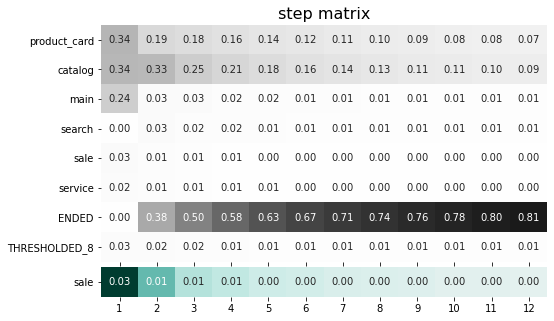

In [72]:
df3_2.rete.step_matrix(max_steps=12,thresh=0.02,
                      targets=['sale'])

Посмотрим на первый столбец, мы можем сказать, что пользователи в анализируемых данных начинают свои сеансы с каталога продуктов (34%), с общего каталога (34%) и меню (24%). На шаге № 2 38% пользователей уже завершили свои сеансы и не имеют других событий (строка, завершанная на шаге 2, равна 0,38). Далее мы видим, что 58% пользователей завершают свои сеансы с 4 события, далее с 5 события действия клиентов приводят к очень маленькой конверсии "sale" = 0. 

Проблемные шаги: 
- идет уменьшение клиентов в шаге № 2 (19%) по сравнению с шагом № 1 (34%) в каталоге продуктов;
- идет уменьшение клиентов в шаге № 2 (24%) по сравнению с шагом № 1 (3%) в меню

### 2. Анализ поведение пользователей с помощью диаграммы retentioneering 

Для анализа минорных сценариев добавим тип страницы "lost" c помощью функции (если client_id в течение дня не совершил покупку, то добавим по пользователю тип старницы "lost" по максимальному "timestamp" в рассматриваемый день) 

In [73]:
def lost(y):
    y['дата']=y["timestamp"].apply(lambda x: x[:10])
    y['ity']=y[['client_id','дата']].apply(lambda x: ''.join(x),axis=1)
    sal = y[y['page_type']=='sale']['ity'].tolist()
    y1 = y.loc[~y['ity'].isin(sal)]
    piv = pd.pivot_table(y1, index=['дата','client_id'], values=["timestamp"], aggfunc=np.max)
    m = [i[0] for i in piv.values]
    filter1= y1['timestamp'].isin(m)
    y1=y1[filter1]
    y1['page_type']='lost'
    y2=pd.concat([y,y1])
    y2.reset_index(inplace = True)
    y3= y2.drop(columns=['index','дата','ity'])
    return y3 

In [74]:
start = time.time()
df3_3=lost(df3_2)
end = time.time()
print("Execution time of the program is- ", end-start)

Execution time of the program is-  457.02527952194214


In [75]:
df3_3.rete.plot_graph(norm_type='full',
                     weight_col='client_id',
                     thresh=0.02,
                     targets = {'sale':'green','lost':'red'})

'experiments/graph_2022-05-05 22_56_58_753099.html'

### На диаграмме видна сценарии, которые не приводят к конверсии:
1. main -  search -  product_card - lost;

2. main -  catalog - product_card - lost;

3. main - catalog -  product_card - service -  lost.

## 3. Сформируем 2-3 гипотезы для расширения самых проблемных мест воронки.

Исходя из проведенного анализа установлена, что проблемных места воронки и минорные пользовательские сценарии связаны со следующими типами страниц : main,  catalog, product_card.
##### 1. Гипотеза карточки товара:
Если в карточку товара добавить больше полезной структурированной информации, пользователям будет, на что опираться при принятии решения. Это должно быть то, что отличает товар от других аналогичных. В карточку можно добавить информацию о полученных товаром премиях, о том, что он выбран определенное количество раз, ввести шкалу рейтинга покупки товара, сделать ставку на преимущества компании. Эта гипотеза увеличивает CR более чем на 20%;

##### 2. Гипотеза Меню
Основные элементы, на которые кликает посетитель, могут принести конверсию, если удачно поменять оттенок, CR может возрости более чем на 10%;

##### 3. Гипотеза Каталог
Если сделать удобный каталог и фильтрацию CR вырастит более чем на 15%.  Разместить группы товаров и фильтрацию слева, справа — превью карточек товара. На превью карточек товара указать название, доступные размеры, цену, миниатюру фото, кнопку «Купить” или “Подробнее».
Сверху над превью товаров разместите сортировку по стоимости и по популярности;



# Задание 4.
После выполнения предыдущего задания продакт ставит вам задачу
«покопаться» в пользователях с минорными сценариями, чтобы
выяснить, чем они отличаются по характеристикам от тех, кто доходит
до покупки.
Необходимо:
1. Провести кластеризацию пользователей с покупкой и наихудшими
паттернами, чтобы понять ключевые отличия
2. Сформулировать выводы о том, в чем основная причина отличия
пользователей, которые показывают худшие сценарии поведения
при покупке, от тех, кто покупку совершает
3. Продумать дополнительный список параметров, который вы бы
предпочли добавить для кластерного анализа, если бы у вас была
такая возможность
Исходные данные за 1 полугодие 2021 года:
• ID события
• ID клиента
• ID сессии
• Время события
• Тип девайса
• Тип страницы
• Канал привлечения

In [4]:
sql2 = """
SELECT d.client_id,d.timestamp, d.page_type, d.device_type, d.channel
from `dataset-000` d
"""

In [6]:
df4 = pd.read_sql_query(sql2,con=conn)

### 1. Проведем кластеризацию пользователей с покупкой и наихудшими паттернами

### Для подбора оптимального количества кластеров по нашим данным воспользуемся диаграммой локтя

In [7]:
df4_1=df4[['client_id','page_type']]

In [8]:
from sklearn.cluster import KMeans

In [9]:
from sklearn.preprocessing import LabelEncoder # проведем кодирование данных
le = LabelEncoder()
for i in df4_1.columns:
    df4_1[i] = le.fit_transform(df4_1[i])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


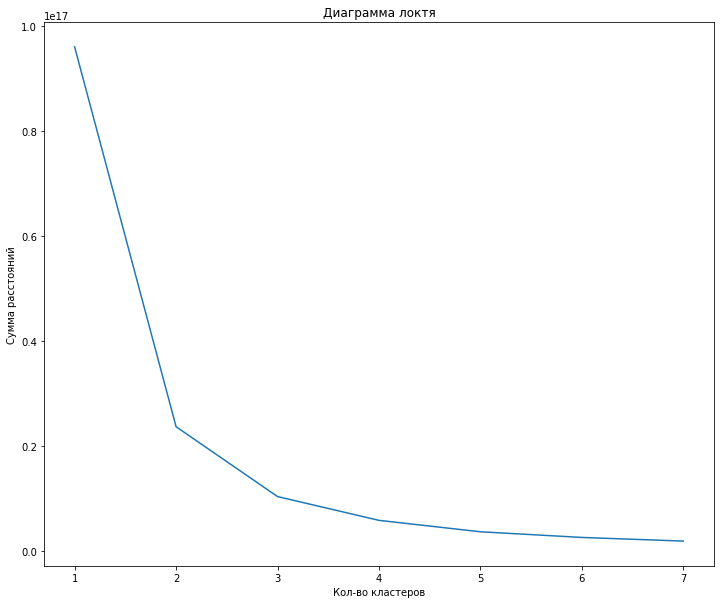

In [10]:
error = []

for k in range(1, 8):
    k_means = KMeans(n_clusters = k, random_state = 42)
    k_means.fit(df4_1)
    error.append(k_means.inertia_)
    
plt.figure(figsize=(12, 10))
plt.title('Диаграмма локтя')
plt.plot(range(1, 8), error)
plt.xlabel('Кол-во кластеров')
plt.ylabel('Сумма расстояний')
plt.show()

### Как видно из Диаграммы локтя оптимальное количество кластеров 5. Теперь мы можем использовать метод get_clusters ( библиотека retentioneering)  для разделения пользователей на группы в зависимости от того, насколько похоже их поведение.

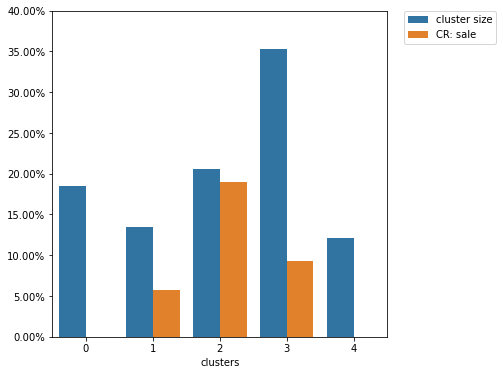

In [8]:
df4.rete.get_clusters(method='kmeans',
                       feature_type='tfidf',
                       n_clusters=5,
                       ngram_range=(1,2),
                       plot_type='cluster_bar',
                       targets=['sale']);

##### Из диаграммы видно, что 1, 2, 3 кластер совершают покупки, при этом у 2 кластера  около 90 % конверсии ('sale'). Наихудшие паттерны у 0 и 4 кластера.   

### 2. Анализ основных причин отличия пользователей, которые показывают худшие сценарии поведения при покупке, от тех, кто покупку совершает.

### Посмотрим отличия пользователей кластера  0 и 4 от кластера 2

In [9]:
clus_0 = df4.rete.filter_cluster(0)

In [10]:
clus_2 = df4.rete.filter_cluster(2)

In [11]:
clus_4 = df4.rete.filter_cluster(4)

In [12]:
clus_0.groupby(['channel']).nunique()['client_id'].sort_values(ascending = False).head(3)

channel
Google     39035
NonPaid    19959
Yandex     16093
Name: client_id, dtype: int64

In [13]:
clus_2.groupby(['channel']).nunique()['client_id'].sort_values(ascending = False).head(3)

channel
NonPaid    31152
SEO        25301
Yandex     22024
Name: client_id, dtype: int64

In [14]:
clus_4.groupby(['channel']).nunique()['client_id'].sort_values(ascending = False).head(3)

channel
SEO        19825
Yandex     17098
NonPaid    10364
Name: client_id, dtype: int64

### По каналам привлечения нет значительного отличия в кластерах 0, 2, 4. В кластере 2 и 4 преобладает: SEO, Yandex, NonPaid, в кластере 0 преобладает: Google, NonPaid, Yandex. 

In [40]:
clus_2.device_type.value_counts(1).head(3)

mobile     0.663665
desktop    0.321739
tablet     0.014167
Name: device_type, dtype: float64

In [41]:
clus_0.device_type.value_counts(1).head(3)

mobile     0.720562
desktop    0.197095
robot      0.066333
Name: device_type, dtype: float64

In [42]:
clus_4.device_type.value_counts(1).head(3)

mobile     0.722571
desktop    0.247042
tablet     0.025384
Name: device_type, dtype: float64

### По устройствам (в процентном соотношении), которыми пользуются пользователи, по кластерам 0, 2, 4 отличий нет. 

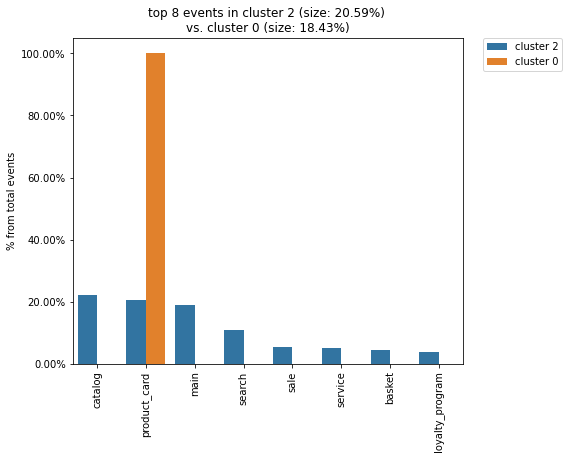

In [24]:
df4.rete.cluster_event_dist(2,0)

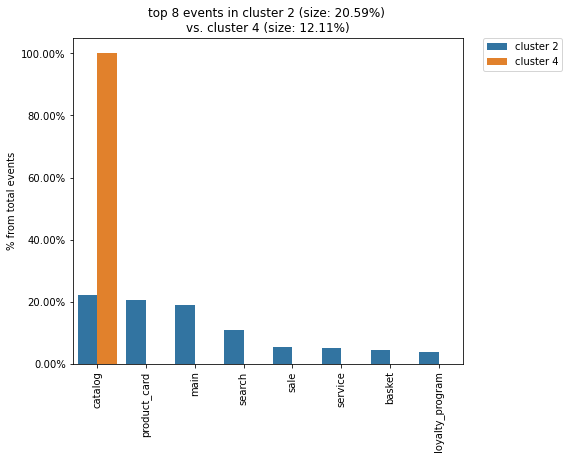

In [18]:
df4.rete.cluster_event_dist(2,4)

### Вывод: По типам страниц в разрезе рассматриваемых кластеров установлено различие действий пользователей. Пользователи кластера 0 и 4 завершают свои действия на одном типе страниц - это catalog или product_card, а пользователи кластера 2 проходят всю воронку продаж. 

### 3. Дополнительный список параметров для кластерного анализа

#### 1. Местоположение;
#### 2. Просмотренная категория товаров;
#### 3. Вовлеченность на каждой странице;
#### 4. Предпочтения по ценовому диапозону.